C. elegans Lineage Data
- Title:    A lineage-resolved molecular atlas of C. elegans embryogenesis at single-cell resolution
- Author:   Packer et al.
- Year:     2019
- doi:      https://doi.org/10.1126/science.aax1971
- GEO:      https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE126954
- file:
  - `.csv`: Supplementary file -> `cell_annotation.csv.gz` -> Column: `lineage`;
  - ~~`.h5ad`: https://zenodo.org/records/15236812~~

Worm Atlas Complete Cell List
- url:      https://www.wormatlas.org/celllistsulston.html
- ref:      Sulston, JE and White, JG (1988), "Parts list", in "The Nematode Caenorhabditis elegans, eds WB Wood et al, Cold Spring Harbor Laboratory Press, Cold Spring Harbor, New York, USA, pp 415 - 431.
  - Title:  The embryonic cell lineage of the nematode Caenorhabditis elegans
  - Author: J.E. Sulston, E. Schierenberg, J.G. White, J.N. Thomson
  - Year:   1983
  - doi:    https://doi.org/10.1016/0012-1606(83)90201-4

Method
1. Generate Tree.
2. a

In [6]:
import os
os.chdir('/Users/yongjunchoi/Documents/GitHub/Research/Research')

# Packer et al., (2019)

## 0. Read `.gz` -> `.nwk` Tree

In [32]:
import pandas as pd
import gzip

file_path = "Polytomy/Codes/Data/GSE126954_cell_annotation.csv.gz"
output_path = "Polytomy/Codes/Data/lineages.csv"

# 1. 데이터 읽기
df = pd.read_csv(file_path, compression="gzip")

# 2. lineage 컬럼 가져오기, 결측 제외
lineages = df['lineage'].dropna()

processed = []

for lineage in lineages:
    # ':' 뒤 제거
    lineage = lineage.split(':')[0]
    # '/' 기준으로 분리
    parts = lineage.split('/')
    processed.extend(parts)

processed_unique_sorted = sorted(set(processed))

# 3. 결과를 DataFrame으로 만들어 csv로 저장
processed_df = pd.DataFrame(processed_unique_sorted, columns=['lineage'])
processed_df.to_csv(output_path, index=False)

print(f"저장 완료: {output_path}")

저장 완료: Polytomy/Codes/Data/lineages.csv


In [ ]:
import pandas as pd
import gzip

file_path = "Polytomy/Codes/Data/GSE126954_cell_annotation.csv.gz"

# 0. pandas에서 gzip 바로 읽기
cell_anno = pd.read_csv(file_path, compression='gzip')

# 1. 데이터 읽기
df = pd.read_csv(file_path, compression="gzip")
lineages = df['lineage'].dropna().unique()  # 결측 제외, 고유 lineage

# 2. lineage -> Newick tree 변환 (대문자 덩어리, 소문자 개별 노드)
def lineage_to_newick(lineages):
    root = Tree(name="zygote")
    
    for lin in lineages:
        # '/'가 있으면 여러 경로로 분리
        paths = lin.split('/')
        for p in paths:
            node = root
            i = 0
            while i < len(p):
                # 대문자인 경우: 연속 대문자 덩어리 추출
                if p[i].isupper():
                    j = i + 1
                    while j < len(p) and p[j].isupper():
                        j += 1
                    chunk = p[i:j]  # 대문자 덩어리
                    i = j
                    # 자식 존재 여부 확인 후 생성
                    existing_child = next((c for c in node.children if c.name == chunk), None)
                    if existing_child:
                        node = existing_child
                    else:
                        node = node.add_child(name=chunk)
                else:
                    # 소문자는 글자 하나씩 노드 생성
                    chunk = p[i]
                    i += 1
                    existing_child = next((c for c in node.children if c.name == chunk), None)
                    if existing_child:
                        node = existing_child
                    else:
                        node = node.add_child(name=chunk)
    return root

tree = lineage_to_newick(lineages)

# 3. Newick 파일로 저장
output_path = "Polytomy/Codes/nwk/c_elegans_lineage_tree_resolved.nwk"
tree.write(format=1, outfile=output_path)

print(f"트리 생성 완료. 저장 위치: {output_path}")

## 1.Read Raw data -> `.nwk` Tree

In [4]:
import os
os.getcwd()
os.chdir('/Users/yongjunchoi/Documents/GitHub/Research/Research')

In [5]:
import pandas as pd
from ete3 import Tree

# 0. 파일 경로
file_path = "Polytomy/Codes/Data/GSE126954_cell_annotation.csv.gz"

# 1. 데이터 읽기
df = pd.read_csv(file_path, compression="gzip")
lineages = df['lineage'].dropna().unique()  # 결측 제외, 고유 lineage

# 2. lineage -> Newick tree 변환 (대문자 덩어리, 소문자 개별 노드)
def lineage_to_newick(lineages):
    root = Tree(name="zygote")
    
    for lin in lineages:
        # '/'가 있으면 여러 경로로 분리
        paths = lin.split('/')
        for p in paths:
            node = root
            i = 0
            while i < len(p):
                # 대문자인 경우: 연속 대문자 덩어리 추출
                if p[i].isupper():
                    j = i + 1
                    while j < len(p) and p[j].isupper():
                        j += 1
                    chunk = p[i:j]  # 대문자 덩어리
                    i = j
                    # 자식 존재 여부 확인 후 생성
                    existing_child = next((c for c in node.children if c.name == chunk), None)
                    if existing_child:
                        node = existing_child
                    else:
                        node = node.add_child(name=chunk)
                else:
                    # 소문자는 글자 하나씩 노드 생성
                    chunk = p[i]
                    i += 1
                    existing_child = next((c for c in node.children if c.name == chunk), None)
                    if existing_child:
                        node = existing_child
                    else:
                        node = node.add_child(name=chunk)
    return root

tree = lineage_to_newick(lineages)

# 3. Newick 파일로 저장
output_path = "Polytomy/Codes/nwk/c_elegans_lineage_tree.nwk"
tree.write(format=1, outfile=output_path)

print(f"트리 생성 완료. 저장 위치: {output_path}")

트리 생성 완료. 저장 위치: Polytomy/Codes/nwk/c_elegans_lineage_tree.nwk


In [6]:
from ete3 import Tree, TreeStyle

# 1. 저장된 Newick 파일 불러오기
tree = Tree("Polytomy/Codes/nwk/c_elegans_lineage_tree.nwk", format=1)

# 2. TreeStyle 설정
ts = TreeStyle()
ts.show_leaf_name = True       # 리프 노드 이름 표시
ts.show_branch_length = False  # branch length 표시 여부
ts.show_branch_support = False # branch support 표시 여부
ts.mode = "r"                  # 'c' = circular, 'r' = rectangular (default)
ts.scale = 20                  # 노드 간 간격 조정

# 3. 트리 시각화
tree.show(tree_style=ts)

## 1.2. `.nwk` Tree -> Polytomy

1. Among leaves, select `n` leaves for polytomy. 
2. Polytomy leaves의 MRCA 확인.
3. Polytomy leaves를 일단 제거.
4. Polytomy leaves MRCA에 polytomy 추가

### 전처리: Polytomy 제거

In [18]:
from ete3 import Tree

# 트리 불러오기
tree = Tree("Polytomy/Codes/nwk/c_elegans_lineage_tree.nwk", format=1)

# root 바로 아래 자식 노드 이름 출력
print("Root 아래 자식 노드들:")
for child in tree.children:
    print(f"- {child.name if child.name else '(internal node)'}")

Root 아래 자식 노드들:
- MS
- D
- AB
- E
- C
- Z
- 2


In [7]:
from ete3 import Tree

# ----------------------------
# 1. Newick 파일 불러오기
# ----------------------------
tree = Tree("Polytomy/Codes/nwk/c_elegans_lineage_tree.nwk", format=1)

# ----------------------------
# 2. Polytomy 제거 함수
# ----------------------------
def remove_polytomy(node):
    # Post-order traversal
    for child in list(node.children):
        remove_polytomy(child)

    # Polytomy 제거 (child >= 3)
    if len(node.children) >= 3:
        for child in list(node.children):
            node.remove_child(child)

# ----------------------------
# 3. 트리 처리 실행
# ----------------------------
remove_polytomy(tree)

# ----------------------------
# 4. 최종 Newick 출력 및 파일 저장
# ----------------------------
output_file = "Polytomy/Codes/nwk/c_elegans_lineage_tree_polytomy_removed.nwk"
tree.write(outfile=output_file)
print(f"Polytomy-removed tree saved to {output_file}")

Polytomy-removed tree saved to Polytomy/Codes/nwk/c_elegans_lineage_tree_polytomy_removed.nwk


# Worm atlas
- url:  https://www.wormatlas.org/celllistsulston.htm
- Wormatlas -> Resource -> Cell Lists -> C. elegans Cell List
- ref:  JE and White, JG (1988), "Parts list", in "The Nematode Caenorhabditis elegans, eds WB Wood et al, Cold Spring Harbor Laboratory Press, Cold Spring Harbor, New York, USA, pp 415 - 431

## 0. 데이터 전처리
- `.`와 ` ` 동일시 (code)
- `,`가 있을 경우 밑에 추가 (code)
- `/`가 있을 경우 밑에 추가 (code)
- `l/r`가 있을 경우 `*l*`, `*r*`로 분리 (manually; #: 1359 -> 1369)
  - `Complete_cell_list.csv` -> `Complete_cell_list_LR.csv`
- Cell 이 `Z`에서 안오면 제거 (code; #: 1369 -> 1264)
- 중복 제거 (code; #: 1264 -> 1229)
  - `Complete_cell_list_LR.csv` -> `Complete_cell_list_preprocessed.csv`

In [3]:
import pandas as pd

# CSV 불러오기
complete_cell_data = pd.read_csv("Polytomy/Codes/Data/Complete_cell_list_LR.csv", quotechar='"')

# '.'을 공백으로 대체
complete_cell_data['Lineage Name'] = complete_cell_data['Lineage Name'].str.replace('.', ' ', regex=False)

# ','와 '/' 기준으로 분리 후 공백 제거하고 explode
complete_cell_data_expanded = complete_cell_data.assign(
    **{
        'Lineage Name': complete_cell_data['Lineage Name']
        .apply(lambda x: [s.strip() for part in x.split(',') for s in part.split('/')])
    }
).explode('Lineage Name').reset_index(drop=True)

# Cell 이름 집합
cell_names = set(complete_cell_data_expanded['Cell'].dropna())

# lineage_maps 생성: Cell -> list of Lineages
from collections import defaultdict

lineage_maps = defaultdict(list)
for _, row in complete_cell_data_expanded.iterrows():
    lineage_maps[row['Cell']].append(row['Lineage Name'])

# 재귀적으로 prefix 교체 및 code 합치기
def resolve_lineage(lineage):
    parts = lineage.split(' ')
    prefix = parts[0]
    codes = ''.join(parts[1:])
    
    if prefix not in lineage_maps:
        return prefix, codes
    else:
        # 첫 번째 Lineage만 재귀 적용
        resolved_prefix, resolved_codes = resolve_lineage(lineage_maps[prefix][0])
        return resolved_prefix, resolved_codes + codes

# 결과 저장
resolved_data = []
for _, row in complete_cell_data_expanded.iterrows():
    cell = row['Cell']
    lineage = row['Lineage Name']
    prefix, codes = resolve_lineage(lineage)
    resolved_data.append({
        'Cell': cell,
        'Prefix': prefix,
        'Code': codes
    })

resolved_df = pd.DataFrame(resolved_data)

# Prefix가 'Z'인 행만 선택
z_only_df = resolved_df[resolved_df['Prefix'] == 'Z'].reset_index(drop=True)

# 'Cell', 'Prefix', 'Code'가 모두 같은 행 제거
z_only_df_unique = z_only_df.drop_duplicates(subset=['Cell', 'Prefix', 'Code']).reset_index(drop=True)

# Prefix와 Code 합치기
z_only_df_unique['Lineage Name'] = z_only_df_unique['Prefix'] + z_only_df_unique['Code']

# 필요한 열만 선택
z_only_df_unique = z_only_df_unique[['Cell', 'Lineage Name']]

# 중복 이름 처리
name_count = {}
def make_unique_name(name):
    if name not in name_count:
        name_count[name] = 1
        return name
    else:
        name_count[name] += 1
        return f"{name}_{name_count[name]}"

# Cell 컬럼에 적용
z_only_df_unique['Cell'] = z_only_df_unique['Cell'].apply(make_unique_name)

# CSV로 저장
preprocessed_output_path = "Polytomy/Codes/Data/Complete_cell_list_preprocessed.csv"
z_only_df_unique.to_csv(preprocessed_output_path, index=False)

## 1. `.csv` to From-To Data

In [70]:
# csv to edge
import pandas as pd
from collections import Counter
from Bio import Phylo
from collections import defaultdict

df = pd.read_csv("Polytomy/Codes/Data/Complete_cell_list_preprocessed.csv")

edges = []

for idx, row in df.iterrows():
    lineage = row['Lineage Name']
    for i in range(1, len(lineage)):
        parent = lineage[:i]       # 부모 코드
        child  = lineage[:i+1]     # 자식 코드
        edges.append({'from': parent, 'to': child})

edges_df = pd.DataFrame(edges).drop_duplicates().reset_index(drop=True)

edges_output_path = "Polytomy/Codes/Data/edges_list_all.csv"
edges_df.to_csv(edges_output_path, index=False)


# edge to nwk
edges_df = pd.read_csv("Polytomy/Codes/Data/edges_list_all.csv")

tree_dict = defaultdict(list)
for _, row in edges_df.iterrows():
    tree_dict[row['from']].append(row['to'])

def build_newick(node):
    if node not in tree_dict or len(tree_dict[node]) == 0:
        return node
    else:
        children_newick = [build_newick(child) for child in tree_dict[node]]
        return "(" + ",".join(children_newick) + ")" + node

root = 'Z'
newick_str = build_newick(root) + ";"

newick_path = "Polytomy/Codes/nwk/Polytomy_Test/tree_all_mapped.nwk"
with open(newick_path, "w") as f:
    f.write(newick_str)

# Remove polytomy in nwk
from Bio import Phylo

newick_path = "Polytomy/Codes/nwk/Polytomy_Test/tree_all_mapped.nwk"
tree = Phylo.read(newick_path, "newick")

print(".csv to edge tree : Total daughters: ", len(tree.get_terminals()))
print(*[f"{k} daughters: {v} nodes" 
        for k, v in sorted(Counter(len(c.clades) for c in tree.find_clades()).items())], 
      sep=", ")

def num_daughters(clade):
    return len(clade.clades)

def remove_nodes(clade):
    clade.clades = [child for child in clade.clades if num_daughters(child) < 3]
    for child in clade.clades:
        remove_nodes(child)
    return None

print("\nRemoving existing polytomy nodes...\n")
remove_nodes(tree.root)

output_path = "Polytomy/Codes/nwk/Polytomy_Test/tree_pruned.nwk"
Phylo.write(tree, output_path, "newick")

tree = Phylo.read(output_path, "newick")
print(".csv to edge tree : Total daughters: ", len(tree.get_terminals()))
print(*[f"{k} daughters: {v} nodes" 
        for k, v in sorted(Counter(len(c.clades) for c in tree.find_clades()).items())], 
      sep=", ")

.csv to edge tree : Total daughters:  1099
0 daughters: 1099 nodes, 1 daughters: 170 nodes, 2 daughters: 1066 nodes, 3 daughters: 1 nodes, 4 daughters: 10 nodes

Removing existing polytomy nodes...

.csv to edge tree : Total daughters:  984
0 daughters: 984 nodes, 1 daughters: 164 nodes, 2 daughters: 983 nodes


## 2. Generate Artificial Polytomy

### Method 1: Pick n among leaves -> Remove leaves -> Add Polytomy
- Polytomy is randomly selected.

In [71]:
import random
from Bio import Phylo
from Bio.Phylo.Newick import Clade
from copy import deepcopy
from collections import Counter

tree_path = "Polytomy/Codes/nwk/Polytomy_Test/tree_pruned.nwk"
tree = Phylo.read(tree_path, "newick")

print("Before pruning: Total daughters: ", len(tree.get_terminals()))
print(*[f"{k} daughters: {v} nodes" 
        for k, v in sorted(Counter(len(c.clades) for c in tree.find_clades()).items())], 
      sep=", ")

all_leaves = [leaf.name for leaf in tree.get_terminals()]
polytomy_size = 16

print(f"\nRandomly selecting {polytomy_size} leaves to prune...\n")

selected_leaves = random.sample(all_leaves, polytomy_size)
mrca = tree.common_ancestor(selected_leaves)
allowed_leaves = [leaf for leaf in all_leaves if leaf not in selected_leaves] + [mrca.name]

def prune(clade, allowed_leaves):
    for child in list(clade.clades):
        prune(child, allowed_leaves)
        if child.is_terminal() and child.name not in allowed_leaves:
            clade.clades.remove(child)

prune(mrca, allowed_leaves)

print("After pruning: Total daughters: ", len(tree.get_terminals()))
print(*[f"{k} daughters: {v} nodes" 
        for k, v in sorted(Counter(len(c.clades) for c in tree.find_clades()).items())], 
      sep=", ")

print(f"\nAdding polytomy...\n")

def add_polytomy(clade, new_children):
    clade.clades.extend(new_children)

add_polytomy(mrca, [Clade(name=leaf) for leaf in selected_leaves])

print("After polytomizing MRCA: Total daughters: ", len(tree.get_terminals()))
print(*[f"{k} daughters: {v} nodes" 
        for k, v in sorted(Counter(len(c.clades) for c in tree.find_clades()).items())], 
      sep=", ")

Before pruning: Total daughters:  984
0 daughters: 984 nodes, 1 daughters: 164 nodes, 2 daughters: 983 nodes

Randomly selecting 16 leaves to prune...

After pruning: Total daughters:  968
0 daughters: 968 nodes, 1 daughters: 179 nodes, 2 daughters: 967 nodes

Adding polytomy...

After polytomizing MRCA: Total daughters:  984
0 daughters: 984 nodes, 1 daughters: 179 nodes, 2 daughters: 966 nodes, 18 daughters: 1 nodes


- 2개씩 큰게 추가됨.
- MRCA에서 Polytomy인 트리 + Polytomy 아닌 트리가 분기되게 해야하나?
  - 그러면 트리가 모양이 너무 바뀌지 않나?

### Method 2: Pick among n-leaved subtree -> Polytomize
- Subtree is randomly selected.

In [72]:
from Bio import Phylo
import random
from collections import Counter
from Bio.Phylo.Newick import Clade

tree_path = "Polytomy/Codes/nwk/Polytomy_Test/tree_pruned.nwk"
tree = Phylo.read(tree_path, "newick")

print("Before polytomizing: Total daughters: ", len(tree.get_terminals()))
print(*[f"{k} daughters: {v} nodes" 
        for k, v in sorted(Counter(len(c.clades) for c in tree.find_clades()).items())], 
      sep=", ")

def find_nodes_with_m_leaves(clade, m):
    nodes = []
    def helper(node):
        if node.is_terminal():
            return 1
        leaf_count = sum(helper(c) for c in node.clades)
        if leaf_count == m:
            nodes.append(node)
        return leaf_count
    helper(clade)
    return nodes

polytomy_size = 4
nodes_with_m_leaves = find_nodes_with_m_leaves(tree.root, polytomy_size)

if len(nodes_with_m_leaves) == 0:
    print("\nUnable to polytomize!")
else:
    print("\nPolytomizing one of the subtree among {} trees...\n".format(len(nodes_with_m_leaves)))

    def count_children(node):
        counts = Counter()
        child_count = len(node.clades)
        counts[child_count] += 1
        
        for child in node.clades:
            counts.update(count_children(child))
        return counts

    child_counter = count_children(tree.root)

    picked_node = random.choice(nodes_with_m_leaves)

    def polytomize_node(node):
        leaves = node.get_terminals()
        node.clades = leaves

    polytomize_node(picked_node)
    print("After polytomizing: Total daughters: ", len(tree.get_terminals()))
    print(*[f"{k} daughters: {v} nodes" 
        for k, v in sorted(Counter(len(c.clades) for c in tree.find_clades()).items())], 
      sep=", ")
    

Before polytomizing: Total daughters:  984
0 daughters: 984 nodes, 1 daughters: 164 nodes, 2 daughters: 983 nodes

Polytomizing one of the subtree among 141 trees...

After polytomizing: Total daughters:  984
0 daughters: 984 nodes, 1 daughters: 161 nodes, 2 daughters: 980 nodes, 4 daughters: 1 nodes


## 3. Randomly Generate Resolved Polytomy

In [22]:
# Tree to Canonical Tree Form
## Load rpy2: R to Python
%load_ext rpy2.ipython

import rpy2.robjects as ro
# print(ro.r('version'))

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


Functions
- `poweRbal`
  - BD Model: `genAltBirthDeathTree`
  - Beta Splitting Model: `genAldousBetaTree`
    - Yule Model: `genAldousBetaTree`, $\beta = 0$
    - Uniform Model: `genAldousBetaTree`, $\beta = -\frac{3}{2}$
- `ape`
  - Kingman Coalescent Model: `rcoal`

In [23]:
%%R
library(ape)
library(poweRbal)

### Method 1: BD Model

In [24]:
%%R
library(ape)
library(poweRbal)

leaves = 10
params <- c(1,0)
reps <- 10
model <- "BD"

trees <- vector("list", reps)
for(i in 1:reps){
    trees[[i]] <- genAltBirthDeathTree(n = size,
                                        BIRTHRATE = params[1],
                                        DEATHRATE = params[2],
                                        TRIES = 1000)
}

path <- "Polytomy/Codes/nwk/Temp_Tree/"
file_name <- sprintf("%s_b%.1f_d%.1f_l%d_r%d.nwk", model, params[1], params[2], leaves, reps)
full_path <- file.path(path, file_name)
write.tree(trees, file = full_path)

### Method 2: Beta Splitting Model

In [25]:
%%R
library(ape)
library(poweRbal)

leaves = 10
params <- c(1)
reps <- 10
model <- "BT" # Beta

trees <- vector("list", reps)
for(i in 1:reps){
    trees[[i]] <- genAldousBetaTree(n = leaves, BETA = params[1])
}

path <- "Polytomy/Codes/nwk/Temp_Tree/"
file_name <- sprintf("%s_b%.1f_l%d_r%d.nwk", model, params[1], leaves, reps)
full_path <- file.path(path, file_name)
write.tree(trees, file = full_path)

### Method 3: Kingman Coalescent Model
- `R` -> `ape` -> vignette -> `Random Topology`

In [26]:
%%R
leaves = 10
params <- 
reps <- 10
model <- "KC" # Kingman Coalescent

trees <- vector("list", reps)
for(i in 1:reps){
    trees[[i]] <- rcoal(n = leaves, br = 'coalescent')
    trees[[i]]$edge.length <- NULL # Remove edge lengths
}

path <- "Polytomy/Codes/nwk/Temp_Tree/"
file_name <- sprintf("%s_b%.1f_l%d_r%d.nwk", model, params[1], leaves, reps)
full_path <- file.path(path, file_name)
write.tree(trees, file = full_path)

### Method 4: Yule Model (Beta : $\beta = 0$)

In [27]:
%%R
library(ape)
library(poweRbal)

leaves = 10
params <- c(0)
reps <- 10
model <- "YL" # Yule

trees <- vector("list", reps)
for(i in 1:reps){
    trees[[i]] <- genAldousBetaTree(n = leaves, BETA = params[1])
}

path <- "Polytomy/Codes/nwk/Temp_Tree/"
file_name <- sprintf("%s_b%.1f_l%d_r%d.nwk", model, params[1], leaves, reps)
full_path <- file.path(path, file_name)
write.tree(trees, file = full_path)

### Method 5: Uniform Random Binary Tree Model (Beta: $\beta = -\frac{3}{2}$)

In [28]:
%%R
library(ape)
library(poweRbal)

leaves = 10
params <- c(-1.5)
reps <- 10
model <- "UF" # Unifrom

trees <- vector("list", reps)
for(i in 1:reps){
    trees[[i]] <- genAldousBetaTree(n = leaves, BETA = params[1])
}

path <- "Polytomy/Codes/nwk/Temp_Tree/"
file_name <- sprintf("%s_b%.1f_l%d_r%d.nwk", model, params[1], leaves, reps)
full_path <- file.path(path, file_name)
write.tree(trees, file = full_path)

## 4. Statistics (R, Python 병행 사용?)

### Statistic 1: Colless' Index ($I_{C}$, $C(T)$) `colless_index`

In [35]:
import dendropy

def colless_index(tree):
    """
    Computes Colless index: sum of absolute differences in leaf counts
    for all internal nodes.
    """
    def count_leaves(node):
        if node.is_leaf():
            return 1
        return sum(count_leaves(c) for c in node.child_nodes())

    def colless_node(node):
        if node.is_leaf() or len(node.child_nodes()) < 2:
            return 0
        left, right = node.child_nodes()[:2]  # binary assumption
        nl = count_leaves(left)
        nr = count_leaves(right)
        return abs(nl - nr) + colless_node(left) + colless_node(right)

    return colless_node(tree.seed_node)

In [36]:
trees = dendropy.TreeList.get(path="Polytomy/Codes/nwk/Temp_Tree/BT_b1.0_l10_r10.nwk",
                              schema="newick")

for tree in trees:
    print("Colless Index:", colless_index(tree))

Colless Index: 11
Colless Index: 20
Colless Index: 14
Colless Index: 17
Colless Index: 8
Colless Index: 4
Colless Index: 18
Colless Index: 15
Colless Index: 8
Colless Index: 7


### Statistic 2: Sackin's Index ($I_{S}$, $S(T)$) `sackins_index`

In [38]:
import dendropy

def sackins_index(tree):
    """
    Computes Sackin index: sum of depths of all leaf nodes
    """
    def leaf_depth_sum(node, depth=0):
        if node.is_leaf():
            return depth
        return sum(leaf_depth_sum(c, depth+1) for c in node.child_nodes())

    return leaf_depth_sum(tree.seed_node)

In [42]:
trees = dendropy.TreeList.get(path="Polytomy/Codes/nwk/Temp_Tree/BT_b1.0_l10_r10.nwk",
                              schema="newick")

for tree in trees:
    print("Sackin's Index:", sackins_index(tree))

Sackin's Index: 37
Sackin's Index: 42
Sackin's Index: 40
Sackin's Index: 41
Sackin's Index: 36
Sackin's Index: 34
Sackin's Index: 42
Sackin's Index: 41
Sackin's Index: 36
Sackin's Index: 35


### Statistic 3: Tree Height ($T_{D}$) `tree_height`

In [44]:
def tree_height(tree):
    max_depth = 0
    def dfs(nd, depth):
        nonlocal max_depth
        if nd.is_leaf():
            max_depth = max(max_depth, depth)
        for c in nd.child_nodes():
            dfs(c, depth+1)
    dfs(tree.seed_node, 0)
    return max_depth

In [45]:
trees = dendropy.TreeList.get(path="Polytomy/Codes/nwk/Temp_Tree/BT_b1.0_l10_r10.nwk",
                              schema="newick")

for tree in trees:
    print("Tree Height:", tree_height(tree))

Tree Height: 5
Tree Height: 7
Tree Height: 5
Tree Height: 6
Tree Height: 5
Tree Height: 4
Tree Height: 6
Tree Height: 5
Tree Height: 5
Tree Height: 5


### Statistic 4: Root-split-ratio `root_split_ratio`

In [47]:
import math

def root_split_ratio(tree):
    """
    Returns a string 'n_left:n_right' indicating the number of leaf nodes
    in the left and right child of the root.
    Handles:
      - binary trees
      - comb trees (1 child)
      - single leaf trees (0 child)
    """
    root_children = tree.seed_node.child_nodes()
    if len(root_children) >= 2:
        n_left = len(root_children[0].leaf_nodes())
        n_right = len(root_children[1].leaf_nodes())
    elif len(root_children) == 1:
        n_left = len(root_children[0].leaf_nodes())
        n_right = 0
    else:
        n_left = 0
        n_right = 0

    if n_left > n_right:
        n_left, n_right = n_right, n_left

    gcd = math.gcd(n_left, n_right)
    left_s = n_left // gcd
    right_s = n_right // gcd

    return f"{left_s}:{right_s}"

In [48]:
trees = dendropy.TreeList.get(path="Polytomy/Codes/nwk/Temp_Tree/BT_b1.0_l10_r10.nwk",
                              schema="newick")

for tree in trees:
    print("Root Split Ratio:", root_split_ratio(tree))

Root Split Ratio: 2:3
Root Split Ratio: 3:7
Root Split Ratio: 1:9
Root Split Ratio: 1:4
Root Split Ratio: 1:1
Root Split Ratio: 2:3
Root Split Ratio: 1:9
Root Split Ratio: 1:9
Root Split Ratio: 1:1
Root Split Ratio: 2:3


### Statistic 5: (Normalized) Robinson-Foulds (RF) Distance `rf_matrix`

In [50]:
import dendropy
from dendropy.calculate import treecompare
import numpy as np
import pandas as pd

def rf_matrix(trees):
    n = len(trees)
    rf_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            rf = treecompare.symmetric_difference(trees[i], trees[j])
            rf_matrix[i,j] = rf
            rf_matrix[j,i] = rf
    return pd.DataFrame(rf_matrix)

def n_rf_matrix(trees, rooted=True):
    n = len(trees)
    rf_matrix = np.zeros((n, n))
    
    n_leaves = len(trees[0].leaf_nodes())
    max_rf = 2 * (n_leaves - 2 if rooted else n_leaves - 3)

    for i in range(n):
        for j in range(i+1, n):
            raw_rf = treecompare.symmetric_difference(trees[i], trees[j])
            norm_rf = raw_rf / max_rf
            rf_matrix[i, j] = rf_matrix[j, i] = norm_rf
    
    return pd.DataFrame(rf_matrix)

In [51]:
trees = dendropy.TreeList.get(path="Polytomy/Codes/nwk/Temp_Tree/BT_b1.0_l10_r10.nwk",
                              schema="newick")

rf_df = rf_matrix(trees)
n_rf_df = n_rf_matrix(trees)

print("RF Distance Matrix:\n", rf_df)
print("Normalized RF Distance Matrix:\n", n_rf_df)

RF Distance Matrix:
       0     1     2     3     4     5     6     7     8     9
0   0.0  14.0  14.0  14.0  14.0  14.0  14.0  12.0  12.0  14.0
1  14.0   0.0  12.0  14.0  14.0  12.0  14.0  10.0  14.0  12.0
2  14.0  12.0   0.0  14.0  12.0  12.0  12.0  10.0  14.0  12.0
3  14.0  14.0  14.0   0.0  14.0  14.0  14.0  14.0  14.0  14.0
4  14.0  14.0  12.0  14.0   0.0  14.0  12.0  14.0  14.0  12.0
5  14.0  12.0  12.0  14.0  14.0   0.0  14.0  12.0  14.0  12.0
6  14.0  14.0  12.0  14.0  12.0  14.0   0.0  14.0  14.0  12.0
7  12.0  10.0  10.0  14.0  14.0  12.0  14.0   0.0  14.0  12.0
8  12.0  14.0  14.0  14.0  14.0  14.0  14.0  14.0   0.0  14.0
9  14.0  12.0  12.0  14.0  12.0  12.0  12.0  12.0  14.0   0.0
Normalized RF Distance Matrix:
        0      1      2      3      4      5      6      7      8      9
0  0.000  0.875  0.875  0.875  0.875  0.875  0.875  0.750  0.750  0.875
1  0.875  0.000  0.750  0.875  0.875  0.750  0.875  0.625  0.875  0.750
2  0.875  0.750  0.000  0.875  0.750  0.750  0.75

In [54]:
import dendropy

def branch_score_distance(tree1, tree2):
    def get_branches(tree):
        br_dict = {}
        for edge in tree.edges():
            if edge.head_node.is_leaf():
                continue
            split = frozenset([l.taxon.label for l in edge.head_node.leaf_nodes()])
            br_dict[split] = edge.length if edge.length else 0.0
        return br_dict
    b1 = get_branches(tree1)
    b2 = get_branches(tree2)
    all_splits = set(b1.keys()).union(set(b2.keys()))
    return sum((b1.get(s,0)-b2.get(s,0))**2 for s in all_splits)**0.5

def branch_score_matrix(trees):
    n = len(trees)
    bs_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            bs = branch_score_distance(trees[i], trees[j])
            bs_matrix[i,j] = bs
            bs_matrix[j,i] = bs
    return pd.DataFrame(bs_matrix)

In [56]:
trees = dendropy.TreeList.get(path="Polytomy/Codes/nwk/Temp_Tree/BT_b1.0_l10_r10.nwk",
                              schema="newick")

bs_df = branch_score_matrix(trees)
print("Branch Score Distance Matrix:\n", bs_df)

Branch Score Distance Matrix:
      0    1    2    3    4    5    6    7    8    9
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0


### Statistic 6: Quartet Distance

In [1]:
import rpy2.robjects as ro
print(ro.r('version'))

Error importing in API mode: ImportError("dlopen(/Users/yongjunchoi/Library/Python/3.9/lib/python/site-packages/_rinterface_cffi_api.abi3.so, 0x0002): Library not loaded: /Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.dylib\n  Referenced from: <08761B8B-0767-3CA6-9437-5468D1CD700F> /Users/yongjunchoi/Library/Python/3.9/lib/python/site-packages/_rinterface_cffi_api.abi3.so\n  Reason: tried: '/Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.dylib' (no such file), '/Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.dylib' (no such file)")
Trying to import in ABI mode.


               _                           
platform       aarch64-apple-darwin20      
arch           aarch64                     
os             darwin20                    
system         aarch64, darwin20           
status                                     
major          4                           
minor          3.3                         
year           2024                        
month          02                          
day            29                          
svn rev        86002                       
language       R                           
version.string R version 4.3.3 (2024-02-29)
nickname       Angel Food Cake             



In [3]:
%load_ext rpy2.ipython

C. elegans Lineage Data
- Title:    A lineage-resolved molecular atlas of C. elegans embryogenesis at single-cell resolution
- Author:   Packer et al.
- Year:     2019
- doi:      https://doi.org/10.1126/science.aax1971
- GEO:      https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE126954
- file:
  - `.csv`: Supplementary file -> `cell_annotation.csv.gz` -> Column: `lineage`;
  - ~~`.h5ad`: https://zenodo.org/records/15236812~~

Worm Atlas Complete Cell List
- url:      https://www.wormatlas.org/celllistsulston.html
- ref:      Sulston, JE and White, JG (1988), "Parts list", in "The Nematode Caenorhabditis elegans, eds WB Wood et al, Cold Spring Harbor Laboratory Press, Cold Spring Harbor, New York, USA, pp 415 - 431.
  - Title:  The embryonic cell lineage of the nematode Caenorhabditis elegans
  - Author: J.E. Sulston, E. Schierenberg, J.G. White, J.N. Thomson
  - Year:   1983
  - doi:    https://doi.org/10.1016/0012-1606(83)90201-4

Method
1. Generate Tree.
2. a

In [10]:
import os
os.chdir('/Users/yongjunchoi/Documents/GitHub/Research/Research')

# Packer et al., (2019)

## 0. Read `.gz` -> `.nwk` Tree

In [ ]:
import pandas as pd
import gzip

file_path = "Polytomy/Codes/Data/GSE126954_cell_annotation.csv.gz"
output_path = "Polytomy/Codes/Data/lineages.csv"

# 1. 데이터 읽기
df = pd.read_csv(file_path, compression="gzip")

# 2. lineage 컬럼 가져오기, 결측 제외
lineages = df['lineage'].dropna()

processed = []

for lineage in lineages:
    # ':' 뒤 제거
    lineage = lineage.split(':')[0]
    # '/' 기준으로 분리
    parts = lineage.split('/')
    processed.extend(parts)

processed_unique_sorted = sorted(set(processed))

# 3. 결과를 DataFrame으로 만들어 csv로 저장
processed_df = pd.DataFrame(processed_unique_sorted, columns=['lineage'])
processed_df.to_csv(output_path, index=False)

print(f"저장 완료: {output_path}")

저장 완료: Polytomy/Codes/Data/lineages.csv


In [ ]:
import pandas as pd
import gzip

file_path = "Polytomy/Codes/Data/GSE126954_cell_annotation.csv.gz"

# 0. pandas에서 gzip 바로 읽기
cell_anno = pd.read_csv(file_path, compression='gzip')

# 1. 데이터 읽기
df = pd.read_csv(file_path, compression="gzip")
lineages = df['lineage'].dropna().unique()  # 결측 제외, 고유 lineage

# 2. lineage -> Newick tree 변환 (대문자 덩어리, 소문자 개별 노드)
def lineage_to_newick(lineages):
    root = Tree(name="zygote")
    
    for lin in lineages:
        # '/'가 있으면 여러 경로로 분리
        paths = lin.split('/')
        for p in paths:
            node = root
            i = 0
            while i < len(p):
                # 대문자인 경우: 연속 대문자 덩어리 추출
                if p[i].isupper():
                    j = i + 1
                    while j < len(p) and p[j].isupper():
                        j += 1
                    chunk = p[i:j]  # 대문자 덩어리
                    i = j
                    # 자식 존재 여부 확인 후 생성
                    existing_child = next((c for c in node.children if c.name == chunk), None)
                    if existing_child:
                        node = existing_child
                    else:
                        node = node.add_child(name=chunk)
                else:
                    # 소문자는 글자 하나씩 노드 생성
                    chunk = p[i]
                    i += 1
                    existing_child = next((c for c in node.children if c.name == chunk), None)
                    if existing_child:
                        node = existing_child
                    else:
                        node = node.add_child(name=chunk)
    return root

tree = lineage_to_newick(lineages)

# 3. Newick 파일로 저장
output_path = "Polytomy/Codes/nwk/c_elegans_lineage_tree_resolved.nwk"
tree.write(format=1, outfile=output_path)

print(f"트리 생성 완료. 저장 위치: {output_path}")

## 1.Read Raw data -> `.nwk` Tree

In [ ]:
import os
os.getcwd()
os.chdir('/Users/yongjunchoi/Documents/GitHub/Research/Research')

In [ ]:
import pandas as pd
from ete3 import Tree

# 0. 파일 경로
file_path = "Polytomy/Codes/Data/GSE126954_cell_annotation.csv.gz"

# 1. 데이터 읽기
df = pd.read_csv(file_path, compression="gzip")
lineages = df['lineage'].dropna().unique()  # 결측 제외, 고유 lineage

# 2. lineage -> Newick tree 변환 (대문자 덩어리, 소문자 개별 노드)
def lineage_to_newick(lineages):
    root = Tree(name="zygote")
    
    for lin in lineages:
        # '/'가 있으면 여러 경로로 분리
        paths = lin.split('/')
        for p in paths:
            node = root
            i = 0
            while i < len(p):
                # 대문자인 경우: 연속 대문자 덩어리 추출
                if p[i].isupper():
                    j = i + 1
                    while j < len(p) and p[j].isupper():
                        j += 1
                    chunk = p[i:j]  # 대문자 덩어리
                    i = j
                    # 자식 존재 여부 확인 후 생성
                    existing_child = next((c for c in node.children if c.name == chunk), None)
                    if existing_child:
                        node = existing_child
                    else:
                        node = node.add_child(name=chunk)
                else:
                    # 소문자는 글자 하나씩 노드 생성
                    chunk = p[i]
                    i += 1
                    existing_child = next((c for c in node.children if c.name == chunk), None)
                    if existing_child:
                        node = existing_child
                    else:
                        node = node.add_child(name=chunk)
    return root

tree = lineage_to_newick(lineages)

# 3. Newick 파일로 저장
output_path = "Polytomy/Codes/nwk/c_elegans_lineage_tree.nwk"
tree.write(format=1, outfile=output_path)

print(f"트리 생성 완료. 저장 위치: {output_path}")

트리 생성 완료. 저장 위치: Polytomy/Codes/nwk/c_elegans_lineage_tree.nwk


In [ ]:
from ete3 import Tree, TreeStyle

# 1. 저장된 Newick 파일 불러오기
tree = Tree("Polytomy/Codes/nwk/c_elegans_lineage_tree.nwk", format=1)

# 2. TreeStyle 설정
ts = TreeStyle()
ts.show_leaf_name = True       # 리프 노드 이름 표시
ts.show_branch_length = False  # branch length 표시 여부
ts.show_branch_support = False # branch support 표시 여부
ts.mode = "r"                  # 'c' = circular, 'r' = rectangular (default)
ts.scale = 20                  # 노드 간 간격 조정

# 3. 트리 시각화
tree.show(tree_style=ts)

## 1.2. `.nwk` Tree -> Polytomy

1. Among leaves, select `n` leaves for polytomy. 
2. Polytomy leaves의 MRCA 확인.
3. Polytomy leaves를 일단 제거.
4. Polytomy leaves MRCA에 polytomy 추가

### 전처리: Polytomy 제거

In [ ]:
from ete3 import Tree

# 트리 불러오기
tree = Tree("Polytomy/Codes/nwk/c_elegans_lineage_tree.nwk", format=1)

# root 바로 아래 자식 노드 이름 출력
print("Root 아래 자식 노드들:")
for child in tree.children:
    print(f"- {child.name if child.name else '(internal node)'}")

Root 아래 자식 노드들:
- MS
- D
- AB
- E
- C
- Z
- 2


In [ ]:
from ete3 import Tree

# ----------------------------
# 1. Newick 파일 불러오기
# ----------------------------
tree = Tree("Polytomy/Codes/nwk/c_elegans_lineage_tree.nwk", format=1)

# ----------------------------
# 2. Polytomy 제거 함수
# ----------------------------
def remove_polytomy(node):
    # Post-order traversal
    for child in list(node.children):
        remove_polytomy(child)

    # Polytomy 제거 (child >= 3)
    if len(node.children) >= 3:
        for child in list(node.children):
            node.remove_child(child)

# ----------------------------
# 3. 트리 처리 실행
# ----------------------------
remove_polytomy(tree)

# ----------------------------
# 4. 최종 Newick 출력 및 파일 저장
# ----------------------------
output_file = "Polytomy/Codes/nwk/c_elegans_lineage_tree_polytomy_removed.nwk"
tree.write(outfile=output_file)
print(f"Polytomy-removed tree saved to {output_file}")

Polytomy-removed tree saved to Polytomy/Codes/nwk/c_elegans_lineage_tree_polytomy_removed.nwk


# Worm atlas
- url:  https://www.wormatlas.org/celllistsulston.htm
- Wormatlas -> Resource -> Cell Lists -> C. elegans Cell List
- ref:  JE and White, JG (1988), "Parts list", in "The Nematode Caenorhabditis elegans, eds WB Wood et al, Cold Spring Harbor Laboratory Press, Cold Spring Harbor, New York, USA, pp 415 - 431

## 0. 데이터 전처리
- `.`와 ` ` 동일시 (code)
- `,`가 있을 경우 밑에 추가 (code)
- `/`가 있을 경우 밑에 추가 (code)
- `l/r`가 있을 경우 `*l*`, `*r*`로 분리 (manually; #: 1359 -> 1369)
  - `Complete_cell_list.csv` -> `Complete_cell_list_LR.csv`
- Cell 이 `Z`에서 안오면 제거 (code; #: 1369 -> 1264)
- 중복 제거 (code; #: 1264 -> 1229)
  - `Complete_cell_list_LR.csv` -> `Complete_cell_list_preprocessed.csv`

In [ ]:
import pandas as pd

# CSV 불러오기
complete_cell_data = pd.read_csv("Polytomy/Codes/Data/Complete_cell_list_LR.csv", quotechar='"')

# '.'을 공백으로 대체
complete_cell_data['Lineage Name'] = complete_cell_data['Lineage Name'].str.replace('.', ' ', regex=False)

# ','와 '/' 기준으로 분리 후 공백 제거하고 explode
complete_cell_data_expanded = complete_cell_data.assign(
    **{
        'Lineage Name': complete_cell_data['Lineage Name']
        .apply(lambda x: [s.strip() for part in x.split(',') for s in part.split('/')])
    }
).explode('Lineage Name').reset_index(drop=True)

# Cell 이름 집합
cell_names = set(complete_cell_data_expanded['Cell'].dropna())

# lineage_maps 생성: Cell -> list of Lineages
from collections import defaultdict

lineage_maps = defaultdict(list)
for _, row in complete_cell_data_expanded.iterrows():
    lineage_maps[row['Cell']].append(row['Lineage Name'])

# 재귀적으로 prefix 교체 및 code 합치기
def resolve_lineage(lineage):
    parts = lineage.split(' ')
    prefix = parts[0]
    codes = ''.join(parts[1:])
    
    if prefix not in lineage_maps:
        return prefix, codes
    else:
        # 첫 번째 Lineage만 재귀 적용
        resolved_prefix, resolved_codes = resolve_lineage(lineage_maps[prefix][0])
        return resolved_prefix, resolved_codes + codes

# 결과 저장
resolved_data = []
for _, row in complete_cell_data_expanded.iterrows():
    cell = row['Cell']
    lineage = row['Lineage Name']
    prefix, codes = resolve_lineage(lineage)
    resolved_data.append({
        'Cell': cell,
        'Prefix': prefix,
        'Code': codes
    })

resolved_df = pd.DataFrame(resolved_data)

# Prefix가 'Z'인 행만 선택
z_only_df = resolved_df[resolved_df['Prefix'] == 'Z'].reset_index(drop=True)

# 'Cell', 'Prefix', 'Code'가 모두 같은 행 제거
z_only_df_unique = z_only_df.drop_duplicates(subset=['Cell', 'Prefix', 'Code']).reset_index(drop=True)

# Prefix와 Code 합치기
z_only_df_unique['Lineage Name'] = z_only_df_unique['Prefix'] + z_only_df_unique['Code']

# 필요한 열만 선택
z_only_df_unique = z_only_df_unique[['Cell', 'Lineage Name']]

# 중복 이름 처리
name_count = {}
def make_unique_name(name):
    if name not in name_count:
        name_count[name] = 1
        return name
    else:
        name_count[name] += 1
        return f"{name}_{name_count[name]}"

# Cell 컬럼에 적용
z_only_df_unique['Cell'] = z_only_df_unique['Cell'].apply(make_unique_name)

# CSV로 저장
preprocessed_output_path = "Polytomy/Codes/Data/Complete_cell_list_preprocessed.csv"
z_only_df_unique.to_csv(preprocessed_output_path, index=False)

## 1. `.csv` to From-To Data

In [ ]:
# csv to edge
import pandas as pd
from collections import Counter
from Bio import Phylo
from collections import defaultdict

df = pd.read_csv("Polytomy/Codes/Data/Complete_cell_list_preprocessed.csv")

edges = []

for idx, row in df.iterrows():
    lineage = row['Lineage Name']
    for i in range(1, len(lineage)):
        parent = lineage[:i]       # 부모 코드
        child  = lineage[:i+1]     # 자식 코드
        edges.append({'from': parent, 'to': child})

edges_df = pd.DataFrame(edges).drop_duplicates().reset_index(drop=True)

edges_output_path = "Polytomy/Codes/Data/edges_list_all.csv"
edges_df.to_csv(edges_output_path, index=False)


# edge to nwk
edges_df = pd.read_csv("Polytomy/Codes/Data/edges_list_all.csv")

tree_dict = defaultdict(list)
for _, row in edges_df.iterrows():
    tree_dict[row['from']].append(row['to'])

def build_newick(node):
    if node not in tree_dict or len(tree_dict[node]) == 0:
        return node
    else:
        children_newick = [build_newick(child) for child in tree_dict[node]]
        return "(" + ",".join(children_newick) + ")" + node

root = 'Z'
newick_str = build_newick(root) + ";"

newick_path = "Polytomy/Codes/nwk/Polytomy_Test/tree_all_mapped.nwk"
with open(newick_path, "w") as f:
    f.write(newick_str)

# Remove polytomy in nwk
from Bio import Phylo

newick_path = "Polytomy/Codes/nwk/Polytomy_Test/tree_all_mapped.nwk"
tree = Phylo.read(newick_path, "newick")

print(".csv to edge tree : Total daughters: ", len(tree.get_terminals()))
print(*[f"{k} daughters: {v} nodes" 
        for k, v in sorted(Counter(len(c.clades) for c in tree.find_clades()).items())], 
      sep=", ")

def num_daughters(clade):
    return len(clade.clades)

def remove_nodes(clade):
    clade.clades = [child for child in clade.clades if num_daughters(child) < 3]
    for child in clade.clades:
        remove_nodes(child)
    return None

print("\nRemoving existing polytomy nodes...\n")
remove_nodes(tree.root)

output_path = "Polytomy/Codes/nwk/Polytomy_Test/tree_pruned.nwk"
Phylo.write(tree, output_path, "newick")

tree = Phylo.read(output_path, "newick")
print(".csv to edge tree : Total daughters: ", len(tree.get_terminals()))
print(*[f"{k} daughters: {v} nodes" 
        for k, v in sorted(Counter(len(c.clades) for c in tree.find_clades()).items())], 
      sep=", ")

.csv to edge tree : Total daughters:  1099
0 daughters: 1099 nodes, 1 daughters: 170 nodes, 2 daughters: 1066 nodes, 3 daughters: 1 nodes, 4 daughters: 10 nodes

Removing existing polytomy nodes...

.csv to edge tree : Total daughters:  984
0 daughters: 984 nodes, 1 daughters: 164 nodes, 2 daughters: 983 nodes


## 2. Generate Artificial Polytomy

### Method 1: Pick n among leaves -> Remove leaves -> Add Polytomy
- Polytomy is randomly selected.

In [ ]:
import random
from Bio import Phylo
from Bio.Phylo.Newick import Clade
from copy import deepcopy
from collections import Counter

tree_path = "Polytomy/Codes/nwk/Polytomy_Test/tree_pruned.nwk"
tree = Phylo.read(tree_path, "newick")

print("Before pruning: Total daughters: ", len(tree.get_terminals()))
print(*[f"{k} daughters: {v} nodes" 
        for k, v in sorted(Counter(len(c.clades) for c in tree.find_clades()).items())], 
      sep=", ")

all_leaves = [leaf.name for leaf in tree.get_terminals()]
polytomy_size = 16

print(f"\nRandomly selecting {polytomy_size} leaves to prune...\n")

selected_leaves = random.sample(all_leaves, polytomy_size)
mrca = tree.common_ancestor(selected_leaves)
allowed_leaves = [leaf for leaf in all_leaves if leaf not in selected_leaves] + [mrca.name]

def prune(clade, allowed_leaves):
    for child in list(clade.clades):
        prune(child, allowed_leaves)
        if child.is_terminal() and child.name not in allowed_leaves:
            clade.clades.remove(child)

prune(mrca, allowed_leaves)

print("After pruning: Total daughters: ", len(tree.get_terminals()))
print(*[f"{k} daughters: {v} nodes" 
        for k, v in sorted(Counter(len(c.clades) for c in tree.find_clades()).items())], 
      sep=", ")

print(f"\nAdding polytomy...\n")

def add_polytomy(clade, new_children):
    clade.clades.extend(new_children)

add_polytomy(mrca, [Clade(name=leaf) for leaf in selected_leaves])

print("After polytomizing MRCA: Total daughters: ", len(tree.get_terminals()))
print(*[f"{k} daughters: {v} nodes" 
        for k, v in sorted(Counter(len(c.clades) for c in tree.find_clades()).items())], 
      sep=", ")

Before pruning: Total daughters:  984
0 daughters: 984 nodes, 1 daughters: 164 nodes, 2 daughters: 983 nodes

Randomly selecting 16 leaves to prune...

After pruning: Total daughters:  968
0 daughters: 968 nodes, 1 daughters: 179 nodes, 2 daughters: 967 nodes

Adding polytomy...

After polytomizing MRCA: Total daughters:  984
0 daughters: 984 nodes, 1 daughters: 179 nodes, 2 daughters: 966 nodes, 18 daughters: 1 nodes


- 2개씩 큰게 추가됨.
- MRCA에서 Polytomy인 트리 + Polytomy 아닌 트리가 분기되게 해야하나?
  - 그러면 트리가 모양이 너무 바뀌지 않나?

### Method 2: Pick among n-leaved subtree -> Polytomize
- Subtree is randomly selected.

In [ ]:
from Bio import Phylo
import random
from collections import Counter
from Bio.Phylo.Newick import Clade

tree_path = "Polytomy/Codes/nwk/Polytomy_Test/tree_pruned.nwk"
tree = Phylo.read(tree_path, "newick")

print("Before polytomizing: Total daughters: ", len(tree.get_terminals()))
print(*[f"{k} daughters: {v} nodes" 
        for k, v in sorted(Counter(len(c.clades) for c in tree.find_clades()).items())], 
      sep=", ")

def find_nodes_with_m_leaves(clade, m):
    nodes = []
    def helper(node):
        if node.is_terminal():
            return 1
        leaf_count = sum(helper(c) for c in node.clades)
        if leaf_count == m:
            nodes.append(node)
        return leaf_count
    helper(clade)
    return nodes

polytomy_size = 4
nodes_with_m_leaves = find_nodes_with_m_leaves(tree.root, polytomy_size)

if len(nodes_with_m_leaves) == 0:
    print("\nUnable to polytomize!")
else:
    print("\nPolytomizing one of the subtree among {} trees...\n".format(len(nodes_with_m_leaves)))

    def count_children(node):
        counts = Counter()
        child_count = len(node.clades)
        counts[child_count] += 1
        
        for child in node.clades:
            counts.update(count_children(child))
        return counts

    child_counter = count_children(tree.root)

    picked_node = random.choice(nodes_with_m_leaves)

    def polytomize_node(node):
        leaves = node.get_terminals()
        node.clades = leaves

    polytomize_node(picked_node)
    print("After polytomizing: Total daughters: ", len(tree.get_terminals()))
    print(*[f"{k} daughters: {v} nodes" 
        for k, v in sorted(Counter(len(c.clades) for c in tree.find_clades()).items())], 
      sep=", ")
    

Before polytomizing: Total daughters:  984
0 daughters: 984 nodes, 1 daughters: 164 nodes, 2 daughters: 983 nodes

Polytomizing one of the subtree among 141 trees...

After polytomizing: Total daughters:  984
0 daughters: 984 nodes, 1 daughters: 161 nodes, 2 daughters: 980 nodes, 4 daughters: 1 nodes


## 3. Randomly Generate Resolved Polytomy

In [81]:
# Tree to Canonical Tree Form
## Load rpy2: R to Python
%load_ext rpy2.ipython

import rpy2.robjects as ro
print(ro.r('version'))

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
               _                           
platform       aarch64-apple-darwin20      
arch           aarch64                     
os             darwin20                    
system         aarch64, darwin20           
status                                     
major          4                           
minor          3.3                         
year           2024                        
month          02                          
day            29                          
svn rev        86002                       
language       R                           
version.string R version 4.3.3 (2024-02-29)
nickname       Angel Food Cake             



In [ ]:
%%R
library(ape)
library(poweRbal)

### Method 1: BD Model

In [ ]:
%%R
library(ape)
library(poweRbal)

leaves = 10
params <- c(1,0)
reps <- 10
model <- "BD"

trees <- vector("list", reps)
for(i in 1:reps){
    trees[[i]] <- genAltBirthDeathTree(n = size,
                                        BIRTHRATE = params[1],
                                        DEATHRATE = params[2],
                                        TRIES = 1000)
}

path <- "Polytomy/Codes/nwk/Temp_Tree/"
file_name <- sprintf("%s_b%.1f_d%.1f_l%d_r%d.nwk", model, params[1], params[2], leaves, reps)
full_path <- file.path(path, file_name)
write.tree(trees, file = full_path)

### Method 2: Beta Splitting Model

In [ ]:
%%R
library(ape)
library(poweRbal)

leaves = 10
params <- c(1)
reps <- 10
model <- "BT" # Beta

trees <- vector("list", reps)
for(i in 1:reps){
    trees[[i]] <- genAldousBetaTree(n = leaves, BETA = params[1])
}

path <- "Polytomy/Codes/nwk/Temp_Tree/"
file_name <- sprintf("%s_b%.1f_l%d_r%d.nwk", model, params[1], leaves, reps)
full_path <- file.path(path, file_name)
write.tree(trees, file = full_path)

### Method 3: Kingman Coalescent Model
- `R` -> `ape` -> vignette -> `Random Topology`

In [ ]:
%%R
leaves = 10
params <- 
reps <- 10
model <- "KC" # Kingman Coalescent

trees <- vector("list", reps)
for(i in 1:reps){
    trees[[i]] <- rcoal(n = leaves, br = 'coalescent')
    trees[[i]]$edge.length <- NULL # Remove edge lengths
}

path <- "Polytomy/Codes/nwk/Temp_Tree/"
file_name <- sprintf("%s_b%.1f_l%d_r%d.nwk", model, params[1], leaves, reps)
full_path <- file.path(path, file_name)
write.tree(trees, file = full_path)

### Method 4: Yule Model (Beta : $\beta = 0$)

In [ ]:
%%R
library(ape)
library(poweRbal)

leaves = 10
params <- c(0)
reps <- 10
model <- "YL" # Yule

trees <- vector("list", reps)
for(i in 1:reps){
    trees[[i]] <- genAldousBetaTree(n = leaves, BETA = params[1])
}

path <- "Polytomy/Codes/nwk/Temp_Tree/"
file_name <- sprintf("%s_b%.1f_l%d_r%d.nwk", model, params[1], leaves, reps)
full_path <- file.path(path, file_name)
write.tree(trees, file = full_path)

### Method 5: Uniform Random Binary Tree Model (Beta: $\beta = -\frac{3}{2}$)

In [ ]:
%%R
library(ape)
library(poweRbal)

leaves = 10
params <- c(-1.5)
reps <- 10
model <- "UF" # Unifrom

trees <- vector("list", reps)
for(i in 1:reps){
    trees[[i]] <- genAldousBetaTree(n = leaves, BETA = params[1])
}

path <- "Polytomy/Codes/nwk/Temp_Tree/"
file_name <- sprintf("%s_b%.1f_l%d_r%d.nwk", model, params[1], leaves, reps)
full_path <- file.path(path, file_name)
write.tree(trees, file = full_path)

## 4. Statistics (R, Python 병행 사용?)

### Statistic 1: Colless' Index ($I_{C}$, $C(T)$) `colless_index`

In [118]:
import dendropy

def colless_index(tree):
    """
    Computes Colless index: sum of absolute differences in leaf counts
    for all internal nodes.
    """
    def count_leaves(node):
        if node.is_leaf():
            return 1
        return sum(count_leaves(c) for c in node.child_nodes())

    def colless_node(node):
        if node.is_leaf() or len(node.child_nodes()) < 2:
            return 0
        left, right = node.child_nodes()[:2]  # binary assumption
        nl = count_leaves(left)
        nr = count_leaves(right)
        return abs(nl - nr) + colless_node(left) + colless_node(right)

    return colless_node(tree.seed_node)

### Statistic 2: Sackin's Index ($I_{S}$, $S(T)$) `sackins_index`

In [119]:
import dendropy

def sackins_index(tree):
    """
    Computes Sackin index: sum of depths of all leaf nodes
    """
    def leaf_depth_sum(node, depth=0):
        if node.is_leaf():
            return depth
        return sum(leaf_depth_sum(c, depth+1) for c in node.child_nodes())

    return leaf_depth_sum(tree.seed_node)

### Statistic 3: Tree Height ($T_{D}$) `tree_height`

In [120]:
def tree_height(tree):
    max_depth = 0
    def dfs(nd, depth):
        nonlocal max_depth
        if nd.is_leaf():
            max_depth = max(max_depth, depth)
        for c in nd.child_nodes():
            dfs(c, depth+1)
    dfs(tree.seed_node, 0)
    return max_depth

### Statistic 4: Root-split-ratio `root_split_ratio`

In [121]:
import math

def root_split_ratio(tree):
    root_children = tree.seed_node.child_nodes()
    if len(root_children) >= 2:
        n_left = len(root_children[0].leaf_nodes())
        n_right = len(root_children[1].leaf_nodes())
    elif len(root_children) == 1:
        n_left = len(root_children[0].leaf_nodes())
        n_right = 0
    else:
        n_left = 0
        n_right = 0

    if n_left > n_right:
        n_left, n_right = n_right, n_left

    gcd = math.gcd(n_left, n_right)
    left_s = n_left // gcd
    right_s = n_right // gcd

    return f"{left_s}:{right_s}"

### Statistic 5: (Normalized) Robinson-Foulds (RF) Distance `rf_dist`

In [79]:
from dendropy import Tree
from dendropy.calculate import treecompare
import numpy as np

def rf_dist(trees, normalized=False):
    n = len(trees)
    mat = np.zeros((n, n))
    
    for i in range(n):
        for j in range(i+1, n):
            rf = treecompare.symmetric_difference(trees[i], trees[j])
            if normalized:
                # Normalized RF = RF / (2 * (n_leaves - 3))
                n_leaves = len(trees[i].leaf_nodes())
                rf = rf / (2 * (n_leaves - 3))
            mat[i, j] = rf
            mat[j, i] = rf
    return mat

In [80]:
tree_path = "Polytomy/Codes/nwk/Temp_Tree/BD_b1.0_d0.0_l10_r10.nwk"
trees = dendropy.TreeList.get(path=tree_path, schema="newick")

print(rf_dist(trees, normalized = False))
print(rf_dist(trees, normalized = True))

[[ 0. 12. 14. 14. 14. 12.  6. 14. 14. 14.]
 [12.  0. 14. 14. 12. 12. 14. 12. 14. 14.]
 [14. 14.  0.  8. 14. 14. 12. 14. 14. 14.]
 [14. 14.  8.  0. 14. 14. 12. 14. 14. 14.]
 [14. 12. 14. 14.  0. 12. 14. 14. 12. 14.]
 [12. 12. 14. 14. 12.  0. 12. 14. 14. 14.]
 [ 6. 14. 12. 12. 14. 12.  0. 14. 14. 14.]
 [14. 12. 14. 14. 14. 14. 14.  0. 14. 12.]
 [14. 14. 14. 14. 12. 14. 14. 14.  0. 12.]
 [14. 14. 14. 14. 14. 14. 14. 12. 12.  0.]]
[[0.         0.85714286 1.         1.         1.         0.85714286
  0.42857143 1.         1.         1.        ]
 [0.85714286 0.         1.         1.         0.85714286 0.85714286
  1.         0.85714286 1.         1.        ]
 [1.         1.         0.         0.57142857 1.         1.
  0.85714286 1.         1.         1.        ]
 [1.         1.         0.57142857 0.         1.         1.
  0.85714286 1.         1.         1.        ]
 [1.         0.85714286 1.         1.         0.         0.85714286
  1.         1.         0.85714286 1.        ]
 [0.857142

### Statistic 6: Quartet Distance

In [ ]:
%%R
install.packages("Quartet")
install.packages("TreeTools")
install.packages("shiny")
install.packages(c("TreeTools", "ggplot2", "viridisLite", "cli", "rlang"))

In [63]:
%%R  -o qd -o nqd

library(ape)
library(Quartet)

tree_file <- "Polytomy/Codes/nwk/Temp_Tree/BD_b1.0_d0.0_l10_r10.nwk"
tree_lines <- readLines(tree_file)
num_trees <- length(tree_lines)
num_leaves <- sapply(tree_lines, function(x) length(read.tree(text=x)$tip.label))

qd_matrix <- AllPairsQuartetDistance(tree_file)
max_quartets <- choose(num_leaves[1], 4)

qd <- qd_matrix
nqd <- qd / max_quartets

### (구현 X) Statistic 7: K-tree Score
- $K > 4$ 일때는 오래 걸릴 수 있음. (생략)
  - $K=2$일 때는 RF
  - $K=4$일 때가 quartet과 유사.

### (구현 X) Statistic 8: Branch-score Distance `branch_score_distance` (Need Branch Length!!)

In [ ]:
import dendropy

def branch_score_distance(tree1, tree2):
    def get_branches(tree):
        br_dict = {}
        for edge in tree.edges():
            if edge.head_node.is_leaf():
                continue
            split = frozenset([l.taxon.label for l in edge.head_node.leaf_nodes()])
            br_dict[split] = edge.length if edge.length else 0.0
        return br_dict
    b1 = get_branches(tree1)
    b2 = get_branches(tree2)
    all_splits = set(b1.keys()).union(set(b2.keys()))
    return sum((b1.get(s,0)-b2.get(s,0))**2 for s in all_splits)**0.5

def branch_score_matrix(trees):
    n = len(trees)
    bs_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            bs = branch_score_distance(trees[i], trees[j])
            bs_matrix[i,j] = bs
            bs_matrix[j,i] = bs
    return pd.DataFrame(bs_matrix)

## 5. Automation

In [82]:
import os
os.chdir('/Users/yongjunchoi/Documents/GitHub/Research/Research')

In [183]:
from Bio import Phylo
import random
from collections import Counter
from Bio.Phylo.Newick import Clade
import copy

true_tree_path = "Polytomy/Codes/nwk/Polytomy_Test/tree_pruned.nwk"
true_tree = Phylo.read(true_tree_path, "newick")

In [184]:
def find_nodes_with_m_leaves(clade, m):
    nodes = []
    def helper(node):
        if node.is_terminal():
            return 1
        leaf_count = sum(helper(c) for c in node.clades)
        if leaf_count == m:
            nodes.append(node)
        return leaf_count
    helper(clade)
    return nodes

In [228]:
polytomy_size = 15
total_trial = 1
tree_sample_size = 100

In [229]:

copy_tree = copy.deepcopy(true_tree)
nodes_with_m_leaves = find_nodes_with_m_leaves(copy_tree.root, polytomy_size)

print("Before polytomizing: Total daughters: ", len(copy_tree.get_terminals()))
print(*[f"{k} daughters: {v} nodes" 
    for k, v in sorted(Counter(len(c.clades) for c in copy_tree.find_clades()).items())], 
    sep=", ")

if len(nodes_with_m_leaves) == 0:
    print("\nUnable to polytomize!")
else:
    print("\nPolytomizing one of the subtree among {} trees...\n".format(len(nodes_with_m_leaves)))

    def count_children(node):
        counts = Counter()
        child_count = len(node.clades)
        counts[child_count] += 1
        
        for child in node.clades:
            counts.update(count_children(child))
        return counts

    child_counter = count_children(copy_tree.root)

    picked_node = random.choice(nodes_with_m_leaves)

    answer_subtree = copy.deepcopy(picked_node)
    # 리프 노드 이름 t1, t2, ...
    for i, leaf in enumerate(answer_subtree.get_terminals(), start=1):
        leaf.name = f"t{i}"

    # 내부 노드 이름 제거
    for n in answer_subtree.get_nonterminals():
        n.name = None

    # 모든 branch_length 제거 (재귀)
    def remove_branch_length(clade):
        clade.branch_length = None
        for child in clade.clades:
            remove_branch_length(child)

    remove_branch_length(answer_subtree)
    Phylo.write(answer_subtree, "Polytomy/Codes/nwk/TEST/Answer/polytomy_answer_tree.nwk", "newick")

    # Newick 문자열로 가져오기
    from io import StringIO
    output = StringIO()
    Phylo.write(answer_subtree, output, "newick")
    newick_str = output.getvalue()

    # :0.00000 제거
    import re
    newick_str_no_branch = re.sub(r":0\.0+","", newick_str)

    # 파일로 저장
    with open("Polytomy/Codes/nwk/TEST/Answer/polytomy_answer_tree.nwk","w") as f:
        f.write(newick_str_no_branch)

    def polytomize_node(node):
        leaves = node.get_terminals()
        node.clades = leaves

    polytomize_node(picked_node)
    print("After polytomizing: Total daughters: ", len(copy_tree.get_terminals()))
    print(*[f"{k} daughters: {v} nodes" 
        for k, v in sorted(Counter(len(c.clades) for c in copy_tree.find_clades()).items())], 
      sep=", ")

Before polytomizing: Total daughters:  984
0 daughters: 984 nodes, 1 daughters: 164 nodes, 2 daughters: 983 nodes

Polytomizing one of the subtree among 6 trees...

After polytomizing: Total daughters:  984
0 daughters: 984 nodes, 1 daughters: 161 nodes, 2 daughters: 969 nodes, 15 daughters: 1 nodes


In [230]:
%%R -i polytomy_size -i tree_sample_size
library(ape)
library(poweRbal)

leaves <- polytomy_size
reps   <- tree_sample_size
path <- "Polytomy/Codes/nwk/TEST/Samples"
if (!dir.exists(path)) dir.create(path, recursive = TRUE)

# 모델과 파라미터를 리스트로 정의
models <- list(
  list(name="BD", type="BD", params=data.frame(birth=c(1,2), death=c(0,0.5))),
  list(name="BT", type="Beta", params=data.frame(beta=c(0.2,0.5))),
  list(name="KC", type="KC", params=NULL),
  list(name="YL", type="Yule", params=NULL),
  list(name="UF", type="Uniform", params=NULL)
)

for (m in models) {
  model <- m$name
  type  <- m$type
  params <- m$params
  
  if (type=="BD") {
    for (i in 1:nrow(params)) {
      b <- params$birth[i]
      d <- params$death[i]
      trees <- lapply(1:reps, function(j) genAltBirthDeathTree(n=leaves, BIRTHRATE=b, DEATHRATE=d, TRIES=1000))
      file_name <- sprintf("%s_b%.1f_d%.1f_l%d_r%d.nwk", model, b, d, leaves, reps)
      write.tree(trees, file=file.path(path, file_name))
      cat("Saved:", file_name, "\n")
    }
  } else if (type=="Beta") {
    for (i in 1:nrow(params)) {
      b <- params$beta[i]
      trees <- lapply(1:reps, function(j) genAldousBetaTree(n=leaves, BETA=b))
      file_name <- sprintf("%s_b%.1f_l%d_r%d.nwk", model, b, leaves, reps)
      write.tree(trees, file=file.path(path, file_name))
      cat("Saved:", file_name, "\n")
    }
  } else if (type=="KC") {
    trees <- lapply(1:reps, function(j) {
      tr <- rcoal(n=leaves)
      tr$edge.length <- NULL
      tr
    })
    file_name <- sprintf("%s_l%d_r%d.nwk", model, leaves, reps)
    write.tree(trees, file=file.path(path, file_name))
    cat("Saved:", file_name, "\n")
    
  } else if (type=="Yule") {
    trees <- lapply(1:reps, function(j) genAldousBetaTree(n=leaves, BETA=0))
    file_name <- sprintf("%s_l%d_r%d.nwk", model, leaves, reps)
    write.tree(trees, file=file.path(path, file_name))
    cat("Saved:", file_name, "\n")
    
  } else if (type=="Uniform") {
    trees <- lapply(1:reps, function(j) genAldousBetaTree(n=leaves, BETA=-1.5))
    file_name <- sprintf("%s_l%d_r%d.nwk", model, leaves, reps)
    write.tree(trees, file=file.path(path, file_name))
    cat("Saved:", file_name, "\n")
  }
}

Saved: BD_b1.0_d0.0_l15_r100.nwk 
Saved: BD_b2.0_d0.5_l15_r100.nwk 
Saved: BT_b0.2_l15_r100.nwk 
Saved: BT_b0.5_l15_r100.nwk 
Saved: KC_l15_r100.nwk 
Saved: YL_l15_r100.nwk 
Saved: UF_l15_r100.nwk 


In [231]:
import os
from glob import glob

tree_folder = "Polytomy/Codes/nwk/TEST/Samples"
prefixes = ["BD", "BT", "KC", "YL", "UF"]

# 모델별로 파일 리스트 만들기
all_files = sorted(glob(os.path.join(tree_folder, "*.nwk")))

# 각 모델별로 그룹화
model_files = []
for p in prefixes:
    files = sorted([f for f in all_files 
                    if os.path.basename(f).startswith(p) 
                    and f"l{polytomy_size}" in os.path.basename(f)])
    model_files.extend(files)  # 순서대로 하나의 리스트에 추가

# model_1, model_2, ... 변수 생성
for i, fpath in enumerate(model_files, start=1):
    globals()[f"model_{i}"] = fpath

# models 리스트에 담기
models = [globals()[f"model_{i}"] for i in range(1, len(model_files)+1)]

# 확인
for i, f in enumerate(models, start=1):
    print(f"model_{i}: {f}")

model_1: Polytomy/Codes/nwk/TEST/Samples/BD_b1.0_d0.0_l15_r100.nwk
model_2: Polytomy/Codes/nwk/TEST/Samples/BD_b2.0_d0.5_l15_r100.nwk
model_3: Polytomy/Codes/nwk/TEST/Samples/BT_b0.2_l15_r100.nwk
model_4: Polytomy/Codes/nwk/TEST/Samples/BT_b0.5_l15_r100.nwk
model_5: Polytomy/Codes/nwk/TEST/Samples/KC_l15_r100.nwk
model_6: Polytomy/Codes/nwk/TEST/Samples/YL_l15_r100.nwk
model_7: Polytomy/Codes/nwk/TEST/Samples/UF_l15_r100.nwk


In [232]:
import dendropy
import pandas as pd

# 모델별 파일 리스트
# models = [model_1, model_2, ...] 이미 존재한다고 가정
model_labels = [f"model_{i}" for i in range(1, len(models)+1)]

# 데이터프레임 초기화
df_stats = pd.DataFrame(columns=["Model", "Colless", "Sackin", "Height", "RootSplit"])

for label, fpath in zip(model_labels, models):
    # 파일 하나에 여러 트리가 있으면 TreeList로 읽기
    trees = dendropy.TreeList.get(path=fpath, schema="newick", preserve_underscores=True)
    for tree in trees:
        df_stats.loc[len(df_stats)] = {
            "Model": label,
            "Colless": colless_index(tree),
            "Sackin": sackins_index(tree),
            "Height": tree_height(tree),
            "RootSplit": root_split_ratio(tree)
        }

# polytomy_answer_tree.nwk 통계 계산
answer_tree_path = "Polytomy/Codes/nwk/TEST/Answer/polytomy_answer_tree.nwk"
answer_tree = dendropy.Tree.get(path=answer_tree_path, schema="newick", preserve_underscores=True)

answer_stats = {
    "Colless": colless_index(answer_tree),
    "Sackin": sackins_index(answer_tree),
    "Height": tree_height(answer_tree),
    "RootSplit": root_split_ratio(answer_tree)
}

# df_stats 확인
print(df_stats.head())

     Model  Colless  Sackin  Height RootSplit
0  model_1       36      80       7      1:14
1  model_1       36      80       7      1:14
2  model_1       20      66       7       7:8
3  model_1       41      79       9      2:13
4  model_1       30      72       7       7:8


# Root split ratio plot 할 방법 찾기

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


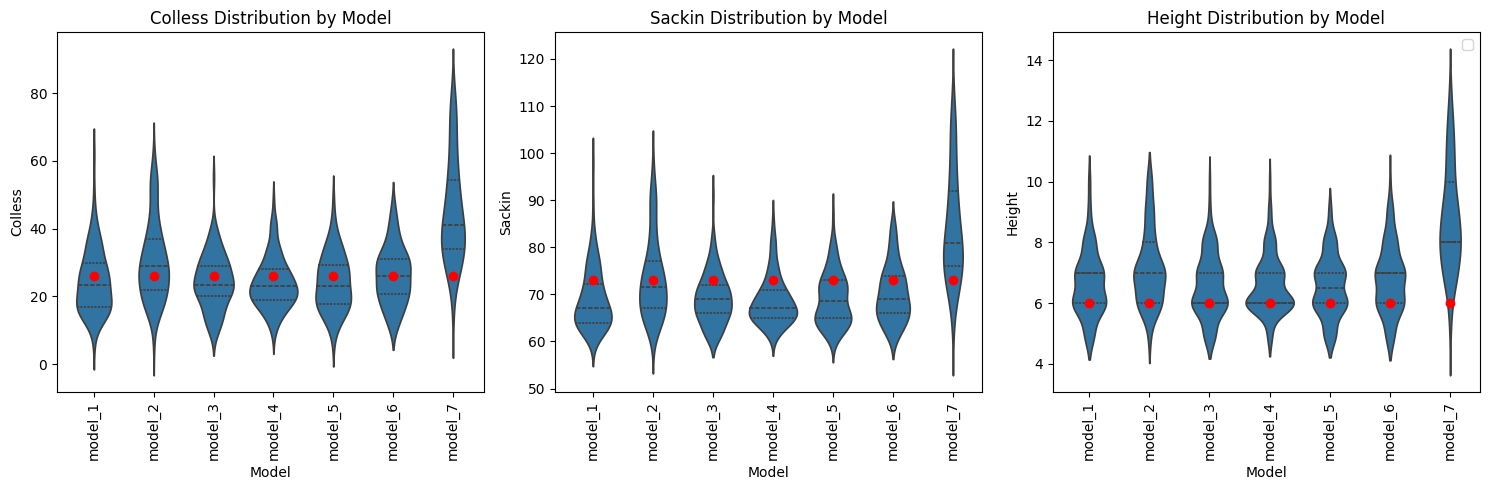

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics = ["Colless", "Sackin", "Height"]

# 모델 순서 그대로
model_labels = [f"model_{i}" for i in range(1, len(models)+1)]

plt.figure(figsize=(15,5))
for i, metric in enumerate(metrics, start=1):
    plt.subplot(1, len(metrics), i)
    
    sns.violinplot(
        x="Model",
        y=metric,
        data=df_stats,
        inner="quartile",
        order=model_labels  # models 순서 그대로
    )
    
    # answer tree 빨간 점 표시
    plt.scatter(
        x=range(len(model_labels)),
        y=[answer_stats[metric]]*len(model_labels),
        color='red',
        zorder=10,
        label="Answer Tree" if i==1 else None
    )
    
    plt.title(f"{metric} Distribution by Model")
    plt.xticks(rotation=90)

plt.tight_layout()
plt.legend()
plt.show()

In [239]:
from dendropy import Tree, TreeList, TaxonNamespace
from dendropy.calculate import treecompare
import matplotlib.pyplot as plt

# -----------------------------
# 1. 정답 트리 로드
# -----------------------------
answer_tree_path = "Polytomy/Codes/nwk/TEST/Answer/polytomy_answer_tree.nwk"

# 공통 TaxonNamespace
taxa = TaxonNamespace()

# 정답 트리 로드
answer_tree = Tree.get(path=answer_tree_path, schema="newick", taxon_namespace=taxa, preserve_underscores=True)
for e in answer_tree.postorder_edge_iter():
    e.length = None  # edge lengths 제거

# -----------------------------
# 2. 모델별 트리 RF 거리 계산
# -----------------------------
rf_distances = []
nrf_distances = []

for model_files in models:  # models 리스트, 각 요소는 파일 경로 리스트
    if isinstance(model_files, str):
        model_files = [model_files]
    
    dists = []
    n_dists = []
    for f in model_files:
        # 파일 내 모든 트리 읽기
        trees = TreeList.get(path=f, schema="newick", taxon_namespace=taxa, preserve_underscores=True)
        for t in trees:
            # edge lengths 제거
            for e in t.postorder_edge_iter():
                e.length = None
            # RF 거리 계산
            rf = treecompare.symmetric_difference(answer_tree, t)
            n_leaves = len(t.leaf_nodes())
            rf_norm = rf / (2 * (n_leaves - 3))

            dists.append(rf)
            n_dists.append(rf_norm)
    rf_distances.append(dists)
    nrf_distances.append(n_dists)

In [245]:
%%R -i answer_tree_path -i models -o qds -o nqds

library(ape)
library(Quartet)

# 정답 트리 읽기
answer_tree <- read.tree(answer_tree_path)

qds <- list()   # 각 파일별 Quartet Distance
nqds <- list()  # 정규화된 QD

for (i in seq_along(models)) {
  file_path <- models[[i]]  # 파일 경로
  tree_lines <- readLines(file_path)  # 파일 내 모든 트리 (한 줄에 하나)
  
  qd_vec <- numeric(length(tree_lines))
  nqd_vec <- numeric(length(tree_lines))
  
  for (j in seq_along(tree_lines)) {
    tr_text <- tree_lines[j]
    
    # Newick 문자열을 객체로 읽기
    tr <- read.tree(text = tr_text)
    num_leaves <- length(tr$tip.label)
    
    # Quartet distance 계산
    # 파일 경로 대신 임시 파일 필요
    tmp_file <- tempfile(fileext = ".nwk")
    writeLines(tr_text, tmp_file)
    qd_val <- QuartetDistance(answer_tree_path, tmp_file)
    unlink(tmp_file)
    
    qd_vec[j] <- qd_val
    nqd_vec[j] <- qd_val / choose(num_leaves, 4)
  }
  
  qds[[i]] <- qd_vec
  nqds[[i]] <- nqd_vec
}
print(length(qds[[1]]))
print(length(nqds[[1]]))

[1] 100
[1] 100


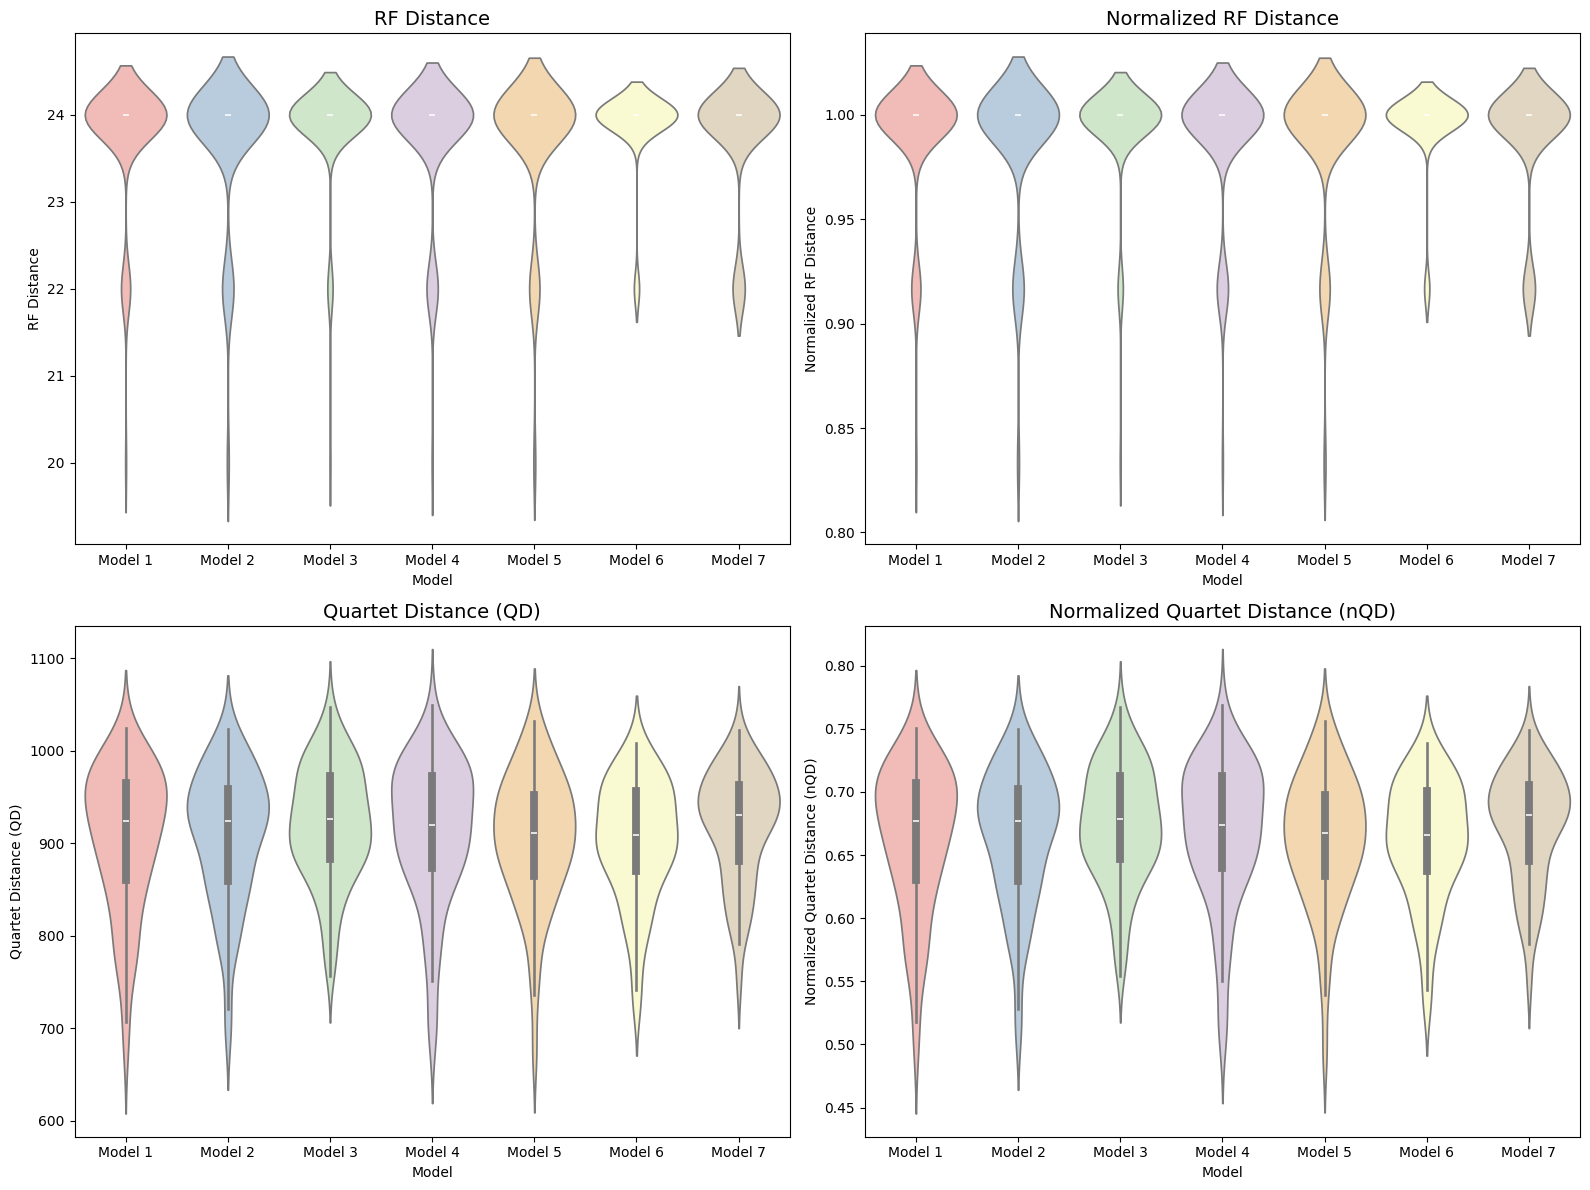

In [251]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

# 경고 숨기기
warnings.filterwarnings("ignore")

# subplot 설정
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()  # 1차원 배열로

# 그릴 데이터와 이름
data_metrics = [
    (rf_distances, "RF Distance"),
    (nrf_distances, "Normalized RF Distance"),
    (qds, "Quartet Distance (QD)"),
    (nqds, "Normalized Quartet Distance (nQD)")
]

for ax, (data_list, metric_name) in zip(axes, data_metrics):
    # 모델 이름
    model_labels = [f"Model {i+1}" for i in range(len(data_list))]
    
    # long-form 데이터프레임 생성
    df = pd.DataFrame({
        "Value": [v for model in data_list for v in model],
        "Model": [model_labels[i] for i, model in enumerate(data_list) for _ in model]
    })
    
    sns.violinplot(x="Model", y="Value", data=df, inner="box", palette="Pastel1", ax=ax)
    ax.set_title(metric_name, fontsize=14)
    ax.set_xlabel("Model")
    ax.set_ylabel(metric_name)

plt.tight_layout()
plt.show()

## 6. Parameter Estimation

### 6.1. Generalized Spliting Model

In [253]:
def resolve_polytomy(clade):
    """Polytomy를 binary로 변환"""
    if clade.is_terminal():
        return
    
    while len(clade.clades) > 2:
        # 두 개 자식만 남기고 나머지는 새로운 내부 노드로 묶기
        first = clade.clades.pop(0)
        second = clade.clades.pop(0)
        new_internal = Clade()
        new_internal.clades = [first, second]
        clade.clades.insert(0, new_internal)
    
    # 재귀 적용
    for child in clade.clades:
        resolve_polytomy(child)

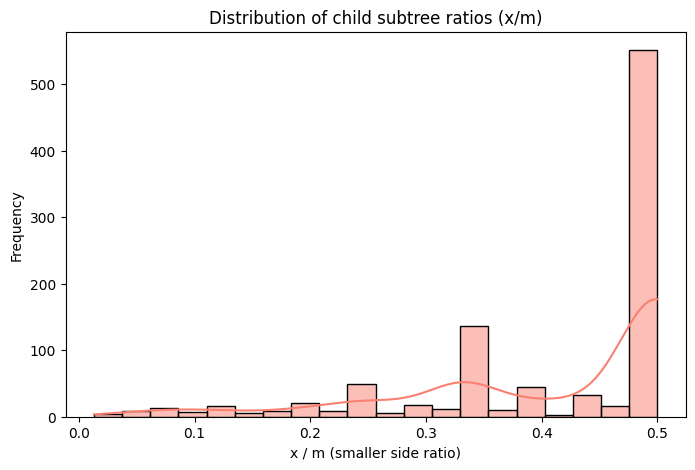

In [258]:
from Bio import Phylo
import matplotlib.pyplot as plt
import seaborn as sns

# 트리 불러오기 (예시: Newick 파일)
del_polytomy_tree = copy.deepcopy(copy_tree)
resolve_polytomy(del_polytomy_tree.root)

ratios = []

def count_leaves(clade):
    """재귀적으로 leaf 개수 세기"""
    if clade.is_terminal():
        return 1
    return sum(count_leaves(child) for child in clade.clades)

# 내부 노드 순회
for clade in tree.find_clades(order="postorder"):
    if not clade.is_terminal() and len(clade.clades) == 2:  # binary node만
        left, right = clade.clades
        left_leaves = count_leaves(left)
        right_leaves = count_leaves(right)
        m = left_leaves + right_leaves
        x = min(left_leaves, right_leaves)
        ratio = x / m
        ratios.append(ratio)

# -----------------------------
# 분포 시각화
# -----------------------------
plt.figure(figsize=(8, 5))
sns.histplot(ratios, bins=20, kde=True, color="salmon", edgecolor="black")
plt.title("Distribution of child subtree ratios (x/m)")
plt.xlabel("x / m (smaller side ratio)")
plt.ylabel("Frequency")
plt.show()

Text(0.5, 1.0, 'Weighted Distribution of Child Subtree Ratios (x/m)')

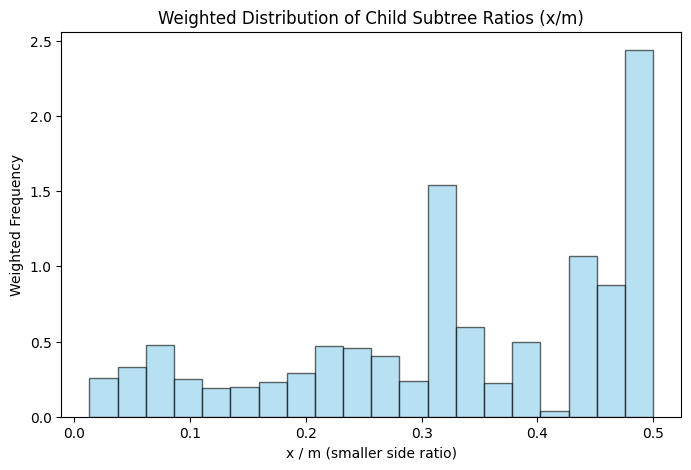

In [264]:
from Bio import Phylo
import matplotlib.pyplot as plt
import seaborn as sns
import copy

# -----------------------------
# 트리 불러오기
# -----------------------------
tree = copy.deepcopy(copy_tree)  # 예시 트리, Newick 불러온 후
resolve_polytomy(tree.root)      # polytomy 제거

# -----------------------------
# 1. Bottom-up leaf count 계산
# -----------------------------
def compute_leaf_counts(node):
    """각 노드에 leaf 개수 저장 (bottom-up)"""
    if node.is_terminal():
        node.num_leaves = 1
    else:
        node.num_leaves = sum(compute_leaf_counts(child) for child in node.clades)
    return node.num_leaves

compute_leaf_counts(tree.root)

# -----------------------------
# 2. Top-down weighted ratio 계산
# -----------------------------
ratios = []
weights = []

def collect_ratios(node, parent_weight=1.0):
    """top-down으로 weight 전달하며 ratio 수집"""
    if node.is_terminal() or len(node.clades) != 2:
        return

    left, right = node.clades
    left_leaves = left.num_leaves
    right_leaves = right.num_leaves
    m = left_leaves + right_leaves
    x = min(left_leaves, right_leaves)
    ratio = x / m

    # 현재 노드의 weight
    left_weight = parent_weight * (left_leaves / m)
    right_weight = parent_weight * (right_leaves / m)

    # ratio와 weight 저장
    ratios.append(ratio)
    weights.append(parent_weight)  # frequency 계산 시 곱할 weight

    # 재귀 호출
    collect_ratios(left, left_weight)
    collect_ratios(right, right_weight)

collect_ratios(tree.root)

import numpy as np
from scipy.stats import gaussian_kde

# 리스트 → numpy 배열
ratios_arr = np.array(ratios)
weights_arr = np.array(weights)

# -----------------------------
# 1. Weighted histogram
# -----------------------------
plt.figure(figsize=(8,5))
plt.hist(ratios_arr, bins=20, weights=weights_arr, color='skyblue', edgecolor='black', alpha=0.6)
plt.xlabel("x / m (smaller side ratio)")
plt.ylabel("Weighted Frequency")
plt.title("Weighted Distribution of Child Subtree Ratios (x/m)")